# Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons - less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.

### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
-  Gender:
    -  male,
    -  female
-  Age:
    -  below 21,
    -  21 to 25,
    -  26 to 30, etc.
-  Marital Status:
    -  single,
    -  married partner,
    -  unmarried partner,
    -  or widowed
-  Number of children:
    -  0,
    -  1,
    -  or more than 1
-  Education:
    -  high school,
    -  bachelors degree,
    -  associates degree,
    -  or graduate degree
-  Occupation:
    -  architecture & engineering,
    -  business & financial, etc.
-  Annual income:
    -  less than \\$12500,
    -  \\$12500 - \\$24999,
    -  \\$25000 - \\$37499, etc.
-  Number of times that he/she goes to a bar:
    -  0,
    -  less than 1,
    -  1 to 3,
    -  4 to 8
    -  or greater than 8
-  Number of times that he/she buys takeaway food:
    -  0,
    -  less than 1,
    -  1 to 3,
    -  4 to 8
    -  or greater than 8
-  Number of times that he/she goes to a coffee house:
    -  0,
    -  less than 1,
    -  1 to 3,
    -  4 to 8
    -  or greater than 8
-  Number of times that he/she eats at a restaurant with average expense less than \\$20 per person:
    -  0,
    -  less than 1,
    -  1 to 3,
    -  4 to 8
    -  or greater than 8
-  Number of times that he/she goes to a bar:
    -  0,
    -  less than 1,
    -  1 to 3,
    -  4 to 8
    -  or greater than 8
    
2. Contextual attributes
- Driving destination:
    - home,
    - work,
    - or no urgent destination
- Location of user, coupon and destination:
    - we provide a map to show the geographical location of the user, destination, and the venue, and we mark the distance between each two places with time of driving. The user can see whether the venue is in the same direction as the destination.
- Weather:
    - sunny,
    - rainy,
    - or snowy
- Temperature:
    - 30F,
    - 55F,
    - or 80F
- Time:
    - 10AM,
    - 2PM,
    - or 6PM
- Passenger:
    - alone,
    - partner,
    - kid(s),
    - or friend(s)


3. Coupon attributes
- time before it expires:
    - 2 hours
    - or one day

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Problems

Use the prompts below to get started with your data analysis.  

### 1. Read in the `coupons.csv` file.

In [7]:
# Load the dataset
data = pd.read_csv('data/coupons.csv')

# Take a look at the columns and make sure the dtypes make sense
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [8]:
# Look at first few rows of data
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


### 2. Investigate the dataset for missing or problematic data.

In [10]:
# Create a table to look at the number of missing values in each column
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

The 'car' column isn't mentioned in the data description above, and has 12576 missing values which is a great majority of our dataset. So, let's remove it and focus on examining the missing values of the other columns, since we will not be able to use 'car' due to the large majority of missing values.

In [12]:
# Take a look at missing values for all columns except for 'car'
data_no_car = data.drop('car', axis = 1)
data_no_car.isna().sum()

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

In [13]:
# Calculate the proportion of data retained if we drop all of these rows with missing values
proportion_retained = 1 - (data.shape[0] - data_no_car.dropna().shape[0])/data.shape[0]
proportion_retained

0.9523021128981394

The proportion of data retained seems to be relatively high. However, we will need to check whether distribution of the 'Y' variable changes if we drop all of these cases.

In [15]:
listwise_deleted_data = data_no_car.dropna()
listwise_deleted_data_yes = listwise_deleted_data.query('Y == 1').shape[0]/listwise_deleted_data.shape[0]
full_data_yes = data.query('Y == 1').shape[0]/data.shape[0]

print('Prop. Yes with Dropped Rows:', listwise_deleted_data_yes, ', Prop. Yes with All Rows:', full_data_yes)

Prop. Yes with Dropped Rows: 0.5693352098683666 , Prop. Yes with All Rows: 0.5684326710816777


It looks like if we use list-wise deletion we are preserving the distribution of the the 'Y', coupon acceptance, column. Because of this and the vast majority of data we preserve I think we can safely drop the rows with missing data. If this proportions were vastly different, I would move forward with imputing the missing values.

### 3. Decide what to do about your missing data -- drop, replace, other...

The columns with missing values are 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', and 'Restaurant20To50'. I will use the mode of each of the columns to update the missing values.

In [19]:
data_cleaned = data.drop('car', axis = 1).dropna()
data_cleaned.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

Now, no columns have missing values and we preserve the variable of focus, 'Y'.

### 4. What proportion of the total observations chose to accept the coupon?

In [22]:
prop_yes = data.query('Y == 1').shape[0]/data.shape[0]
prop_yes

0.5684326710816777

This is the proportion for the fully uncleaned dataset, since the question was posed for the total observations. As we saw above the cleaned data set results in the same proportion when rounded to the nearest hundreth place.

### 5. Use a bar plot to visualize the `coupon` column.

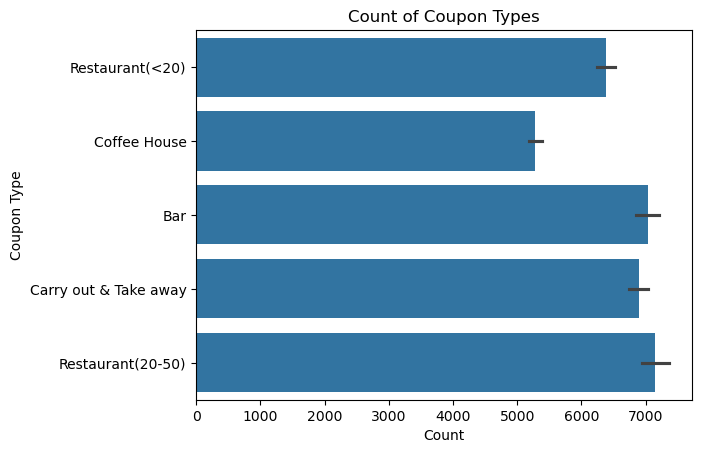

In [25]:
sns.barplot(data_cleaned['coupon'])
plt.title('Count of Coupon Types')
plt.xlabel('Count')
plt.ylabel('Coupon Type')
plt.savefig('bar_plot_coupon_types.png')

### 6. Use a histogram to visualize the temperature column.

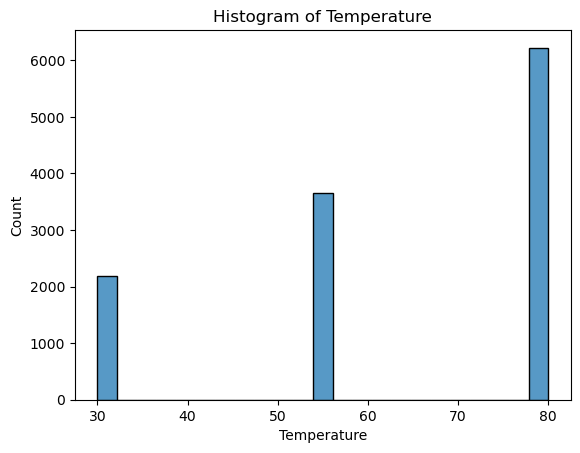

In [27]:
sns.histplot(data_cleaned['temperature'])
plt.title('Histogram of Temperature')
plt.xlabel('Temperature')
plt.savefig('histogram_temperature.png')

In [28]:
data_cleaned['temperature'].value_counts()

temperature
80    6222
55    3662
30    2195
Name: count, dtype: int64

## **Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

### 1. Create a new `DataFrame` that contains just the bar coupons.


In [30]:
bar_coupon_data = data_cleaned.query('coupon == "Bar"')
bar_coupon_data.shape

(1913, 25)

### 2. What proportion of bar coupons were accepted?

In [32]:
prop_yes_bar = bar_coupon_data.query('Y == 1').shape[0]/bar_coupon_data.shape[0]
prop_yes_bar

0.41191845269210664

### 3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

In [34]:
bar_coupon_data = bar_coupon_data.copy()
bar_coupon_data['Bar_Category'] = bar_coupon_data['Bar'].map({
    'never': '3 or Fewer Times',
    'less1': '3 or Fewer Times',
    '1~3': '3 or Fewer Times',
    '4-8': 'More than 3 Times',
    'gt8': 'More than 3 Times'
})

n_3_or_less = bar_coupon_data.query('Bar_Category == "3 or Fewer Times"').shape[0]
n_yes_and_3_or_less = bar_coupon_data.query('(Bar_Category == "3 or Fewer Times") & (Y == 1)').shape[0]

n_more_than_3 = bar_coupon_data.query('Bar_Category == "More than 3 Times"').shape[0]
n_yes_and_more_than_3 = bar_coupon_data.query('(Bar_Category == "More than 3 Times") & (Y == 1)').shape[0]

prop_bar_yes_3_or_less = n_yes_and_3_or_less/n_3_or_less
prop_bar_yes_more_than_3 = n_yes_and_more_than_3/n_more_than_3

In [35]:
prop_bar_yes_3_or_less

0.37267441860465117

In [36]:
prop_bar_yes_more_than_3

0.717391304347826

<Axes: xlabel='Bar_Category', ylabel='Y'>

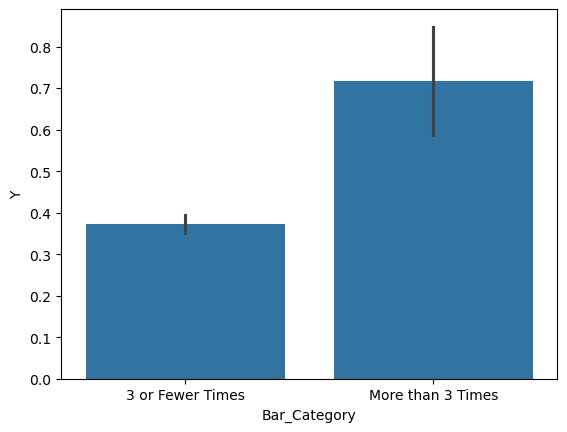

In [37]:
sns.barplot(x = bar_coupon_data['Bar_Category'], y = bar_coupon_data['Y'])

### 4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [39]:
bar_coupon_data['age'].value_counts()

age
21         397
26         368
31         324
50plus     273
36         196
41         171
46         103
below21     81
Name: count, dtype: int64

In [40]:
bar_coupon_data['Bar_Category_Month'] = bar_coupon_data['Bar'].map({
    'never': '< 1 a Month',
    'less1': '< 1 a Month',
    '1~3': '>= 1 a Month',
    '4-8': '>= 1 a Month',
    'gt8': '>= 1 a Month'
})

bar_coupon_data['Age_Category'] = bar_coupon_data['age'].map({
    '21': '<= 25',
    '26': '> 25',
    '31': '> 25',
    '50plus': '> 25',
    '36': '> 25',
    '41': '> 25',
    '46': '> 25',
    'below21': '<= 25'
})

# Group 1: Drivers who go to a bar >= 1 a Month and are > 25
n_greater_than_1_and_25 = bar_coupon_data.query('(Bar_Category_Month == ">= 1 a Month") & (Age_Category == "> 25")').shape[0]
n_yes_and_greater_than_1_and_25 = bar_coupon_data.query('(Bar_Category_Month == ">= 1 a Month") & (Age_Category == "> 25") & (Y == 1)').shape[0]

# Group 2: All others who accepted the coupon (Y == 1) in the dataset
n_yes_all_others = bar_coupon_data.query('(Y == 1)').shape[0] - n_yes_and_greater_than_1_and_25

# Proportions of acceptance within each group
prop_bar_yes_greater_than_1_and_25 = n_yes_and_greater_than_1_and_25 / n_greater_than_1_and_25
prop_bar_yes_all_others = n_yes_all_others / (bar_coupon_data.shape[0] - n_greater_than_1_and_25)

In [41]:
prop_bar_yes_greater_than_1_and_25

0.6566666666666666

In [63]:
prop_bar_yes_all_others

0.36639801611903283

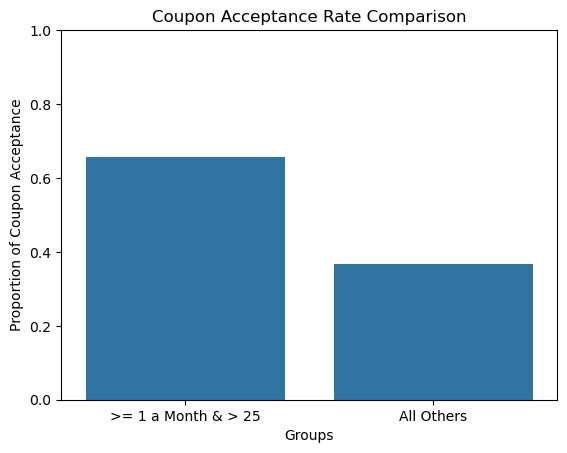

In [78]:
plotting_data = pd.DataFrame({
    'Group': ['>= 1 a Month & > 25', 'All Others'],
    'Proportion': [prop_bar_yes_greater_than_1_and_25, prop_bar_yes_all_others]
})

# Create a seaborn barplot
sns.barplot(x='Group', y='Proportion', data=plotting_data)
plt.title('Coupon Acceptance Rate Comparison')
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1
plt.ylabel('Proportion of Coupon Acceptance')
plt.xlabel('Groups')
plt.show()

### 5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

In [81]:
bar_coupon_data['passanger'].value_counts()

passanger
Alone        1141
Friend(s)     318
Partner       260
Kid(s)        194
Name: count, dtype: int64

In [83]:
bar_coupon_data['occupation'].value_counts()

occupation
Unemployed                                   292
Student                                      237
Computer & Mathematical                      225
Sales & Related                              175
Education&Training&Library                   125
Management                                   108
Office & Administrative Support              101
Arts Design Entertainment Sports & Media      88
Business & Financial                          82
Retired                                       71
Healthcare Support                            44
Food Preparation & Serving Related            43
Community & Social Services                   40
Healthcare Practitioners & Technical          36
Transportation & Material Moving              35
Legal                                         34
Protective Service                            27
Architecture & Engineering                    27
Personal Care & Service                       25
Construction & Extraction                     24
Life Phys

In [89]:
bar_coupon_data['Passenger_Category'] = bar_coupon_data['passanger'].map({
    'Alone': 'Alone',
    'Friend(s)': 'Not a Kid',
    'Partner': 'Not a Kid',
    'Kid(s)': 'Kid',
})

# Group 1: 
n_greater_1_passenger_not_kid_no_fff_job = bar_coupon_data.query('(Bar_Category_Month == ">= 1 a Month") & (Passenger_Category == "Not a Kid") & (occupation != "Farming Fishing & Forestry")').shape[0]
n_yes_and_greater_1_passenger_not_kid_no_fff_job = bar_coupon_data.query('(Bar_Category_Month == ">= 1 a Month") & (Passenger_Category == "Not a Kid") & (occupation != "Farming Fishing & Forestry") & (Y == 1)').shape[0]

# Group 2: All others who accepted the coupon (Y == 1) in the dataset
n_yes_all_others_group_2 = bar_coupon_data.query('(Y == 1)').shape[0] - n_greater_1_passenger_not_kid_no_fff_job

# Proportions of acceptance within each group
prop_bar_yes_greater_1_passenger_not_kid_no_fff_job = n_yes_and_greater_1_passenger_not_kid_no_fff_job / n_greater_1_passenger_not_kid_no_fff_job
prop_bar_yes_all_others_group_2 = n_yes_all_others_group_2 / (bar_coupon_data.shape[0] - n_greater_1_passenger_not_kid_no_fff_job)

In [91]:
prop_bar_yes_greater_1_passenger_not_kid_no_fff_job

0.7181208053691275

In [93]:
prop_bar_yes_all_others_group_2

0.3622448979591837

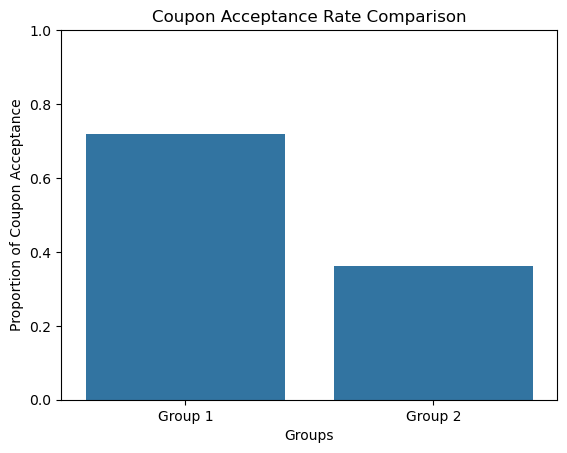

In [143]:
plotting_data_two = pd.DataFrame({
    'Group': ['Group 1', 'Group 2'],
    'Proportion': [prop_bar_yes_greater_1_passenger_not_kid_no_fff_job, prop_bar_yes_all_others_group_2]
})

# Create a seaborn barplot
sns.barplot(x='Group', y='Proportion', data=plotting_data_two)
plt.title('Coupon Acceptance Rate Comparison')
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1
plt.ylabel('Proportion of Coupon Acceptance')
plt.xlabel('Groups')
plt.show()

### 6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



This question confused me, because I am asked to compare the acceptance rates but there are OR statements in-between each bullet. Therefore I will calculate the acceptance rates for each group and then for a the group if we consider the OR statements.

In [107]:
bar_coupon_data['maritalStatus'].value_counts()

maritalStatus
Married partner      833
Single               638
Unmarried partner    352
Divorced              73
Widowed               17
Name: count, dtype: int64

In [129]:
bar_coupon_data['RestaurantLessThan20'].value_counts()

RestaurantLessThan20
1~3      839
4~8      548
less1    312
gt8      186
never     28
Name: count, dtype: int64

In [131]:
bar_coupon_data['income'].value_counts()

income
$25000 - $37499     300
$100000 or More     282
$12500 - $24999     271
$50000 - $62499     249
$37500 - $49999     247
Less than $12500    159
$75000 - $87499     143
$87500 - $99999     133
$62500 - $74999     129
Name: count, dtype: int64

In [123]:
#Group 1
total_greater_1_no_kid_not_widowed = bar_coupon_data.query('(Bar_Category_Month == ">= 1 a Month") & (Passenger_Category == "Not a Kid") & (maritalStatus != "Widowed")').shape[0]
yes_greater_1_no_kid_not_widowed = bar_coupon_data.query('(Bar_Category_Month == ">= 1 a Month") & (Passenger_Category == "Not a Kid") & (maritalStatus != "Widowed") & (Y == 1)').shape[0]

prop_greater_1_no_kid_not_widowed = yes_greater_1_no_kid_not_widowed/total_greater_1_no_kid_not_widowed
prop_greater_1_no_kid_not_widowed

0.7181208053691275

In [127]:
# Group 2
total_greater_1_no_kid_under_30 = bar_coupon_data.query('(Bar_Category_Month == ">= 1 a Month") & (age in ["21", "26", "below21"])').shape[0]
yes_greater_1_no_kid_under_30 = bar_coupon_data.query('(Bar_Category_Month == ">= 1 a Month") & (age in ["21", "26", "below21"]) & (Y == 1)').shape[0]

prop_greater_1_no_kid_under_30 = yes_greater_1_no_kid_under_30/total_greater_1_no_kid_under_30
prop_greater_1_no_kid_under_30

0.6853448275862069

In [135]:
# Group 3
total_restr_greater_4_income_less_50k = bar_coupon_data.query('(RestaurantLessThan20 in ["4~8","gt8"]) & (income in ["$25000 - $37499", "$12500 - $24999", "$37500 - $49999", "Less than $12500"])').shape[0]
yes_restr_greater_4_income_less_50k = bar_coupon_data.query('(RestaurantLessThan20 in ["4~8","gt8"]) & (income in ["$25000 - $37499", "$12500 - $24999", "$37500 - $49999", "Less than $12500"]) & (Y == 1)').shape[0]

prop_restr_greater_4_income_less_50k = yes_restr_greater_4_income_less_50k/total_restr_greater_4_income_less_50k
prop_restr_greater_4_income_less_50k

0.45645645645645644

In [141]:
# Group 1, Group 2, or Group 3
total_group1_2_or_3 = bar_coupon_data.query('((Bar_Category_Month == ">= 1 a Month") & (Passenger_Category == "Not a Kid") & (maritalStatus != "Widowed")) | ((Bar_Category_Month == ">= 1 a Month") & (age in ["21", "26", "below21"]) | ((RestaurantLessThan20 in ["4~8","gt8"]) & (income in ["$25000 - $37499", "$12500 - $24999", "$37500 - $49999", "Less than $12500"])))').shape[0]
yes_group1_2_or_3 = bar_coupon_data.query('((Bar_Category_Month == ">= 1 a Month") & (Passenger_Category == "Not a Kid") & (maritalStatus != "Widowed")) | ((Bar_Category_Month == ">= 1 a Month") & (age in ["21", "26", "below21"]) | ((RestaurantLessThan20 in ["4~8","gt8"]) & (income in ["$25000 - $37499", "$12500 - $24999", "$37500 - $49999", "Less than $12500"]))) & (Y == 1)').shape[0]

prop_group1_2_or_3 = yes_group1_2_or_3/total_group1_2_or_3
prop_group1_2_or_3

0.6171735241502684

### 7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on our analysis, it looks like compared to the overall acceptance rate of coupons, around 57%, the acceptance rate of bar coupons is lower, around 41%. In examining the different groups of our data, we found that those who visited bars often, more than 3 times a month, accepted the coupon at a much higher rate, approxiamtely 72%. If we loosen our restrictions a little for bar visits to more than 1 time a month, and restrict age to those older than 25 we still see a higher acceptance rate than the overall accetance rate. If there are no kids with the user when they receive the bar coupon, the user frequents a bar more than once a month, and is not in the Farming, Fishing, or Forestry industries, we see a similar acceptance rate to those who frequent the bar more than 3 times a month. It could be that there is overlap there. In our last comparison, we see some more interesting details. It appears that those who are more likely to accept the bar coupon are those who are younger without kids and likely have disposable income. While the available data do not directly correspond to the not having kids (just whether or not they are present in the car), I think it is safe to say those without kids are more likely to not have a kid in the car. If this were a marketing task, we would say to target younger adults who make more than average income and have visited bars more than once in the last month.

## Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [76]:
data_cleaned['coupon'].value_counts()

coupon
Coffee House             3816
Restaurant(<20)          2653
Carry out & Take away    2280
Bar                      1913
Restaurant(20-50)        1417
Name: count, dtype: int64

In [78]:
more_exp_restr_data = data_cleaned.query('coupon == "Restaurant(20-50)"')
more_exp_restr_data = more_exp_restr_data.copy()
more_exp_restr_data.shape

(1417, 25)

In [80]:
prop_yes_exp_restr = more_exp_restr_data.query('Y == 1').shape[0]/more_exp_restr_data.shape[0]
prop_yes_exp_restr

0.44601270289343686

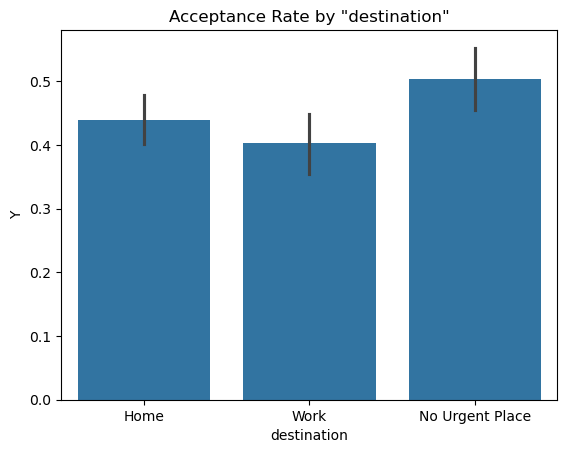

In [199]:
sns.barplot(x = more_exp_restr_data['destination'], y = more_exp_restr_data['Y'])
plt.title('Acceptance Rate by "destination"')
plt.savefig('rate_by_destination.png')

We see a higher acceptance rate for those who are not in a rush and do not have a particular destination. Those going to work accepted the least, < 40%.

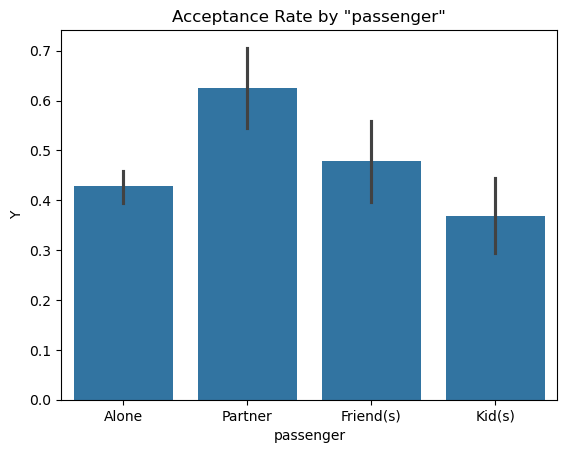

In [207]:
sns.barplot(x = more_exp_restr_data['passanger'], y = more_exp_restr_data['Y'])
plt.title('Acceptance Rate by "passenger"')
plt.xlabel('passenger')
plt.savefig('rate_by_passenger.png')

There are higher acceptance rates for those riding with their signficant other or friends. A majority of those who are alone did not accept the coupon (people tend to prefer not to eat alone at nice a restaurant). An even bigger majority of those with kids did not accept the coupon (eating out at a nice restaurant with a young child can be difficult, so planning ahead is crucial for a lot of parents).

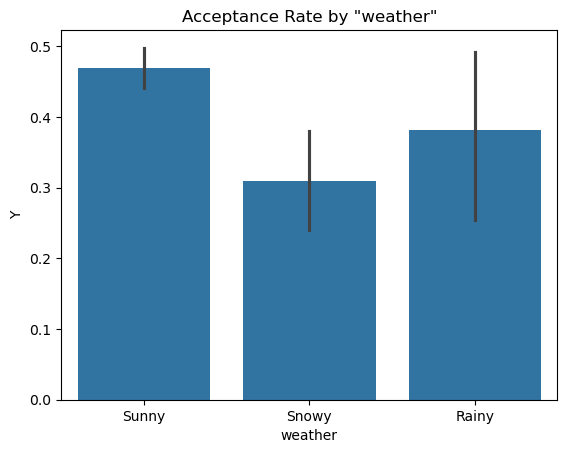

In [209]:
sns.barplot(x = more_exp_restr_data['weather'], y = more_exp_restr_data['Y'])
plt.title('Acceptance Rate by "weather"')
plt.savefig('rate_by_weather.png')

Above, we see that if it is nice and sunny outside people are more likely to accept the coupon compared to bad weather.

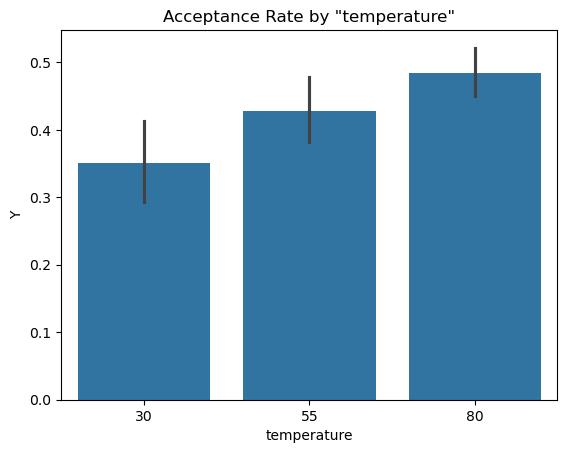

In [211]:
sns.barplot(x = more_exp_restr_data['temperature'], y = more_exp_restr_data['Y'])
plt.title('Acceptance Rate by "temperature"')
plt.savefig('rate_by_temperature.png')

The above tells a similar story to the weather. These variables are not independent of each other since when it is sunny, it is usually a warmer temperature (it is still very possible to have a sunny day with cold temps).

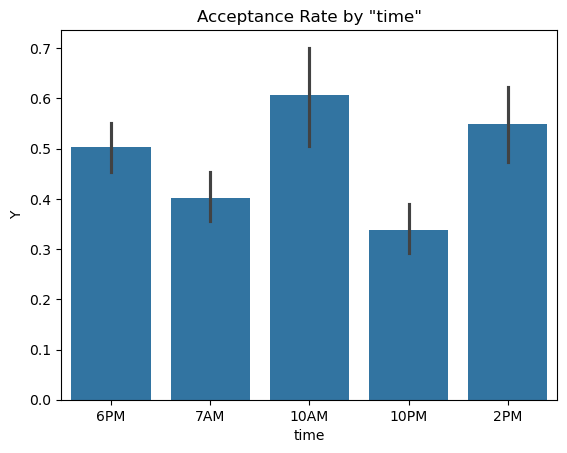

In [213]:
sns.barplot(x = more_exp_restr_data['time'], y = more_exp_restr_data['Y'])
plt.title('Acceptance Rate by "time"')
plt.savefig('rate_by_time.png')

In the time of day that the coupons were delievered, it looks like the most popular times are around brunch (this coincides with those who are not in a rush to get to a particular destination), then a later lunch, and finally around typical dinner time. The other times, early morning and later night, do not appear to be good times to deliver these coupons.

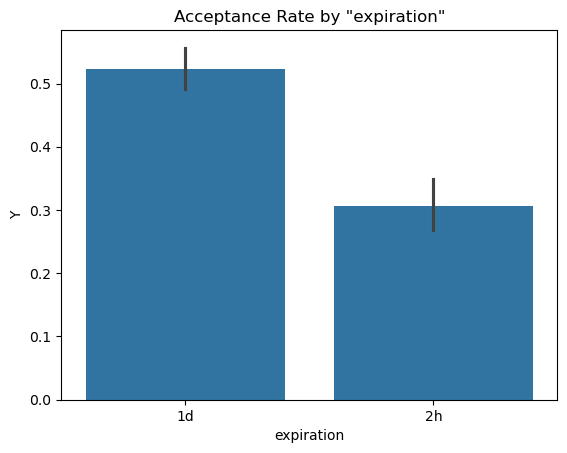

In [215]:
sns.barplot(x = more_exp_restr_data['expiration'], y = more_exp_restr_data['Y'])
plt.title('Acceptance Rate by "expiration"')
plt.savefig('rate_by_expiration.png')

Another very stark difference in acceptance rates is the duration of the coupon. The coupons that could be used within a day had above a 50% acceptance rate while those coupons with a two hour expiration time on the same date are only accepting the coupons about 30% of the time.

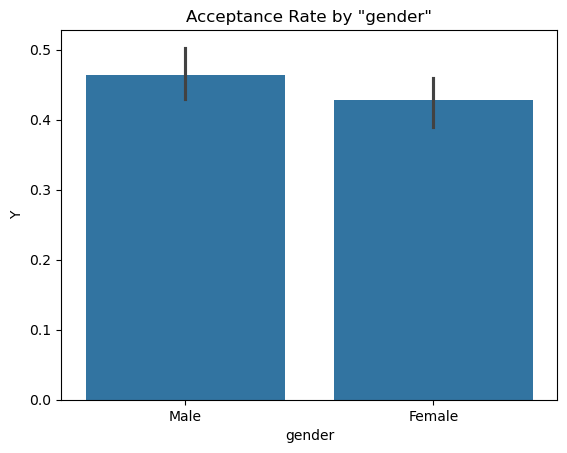

In [217]:
sns.barplot(x = more_exp_restr_data['gender'], y = more_exp_restr_data['Y'])
plt.title('Acceptance Rate by "gender"')
plt.savefig('rate_by_gender.png')

There doesn't seem to be a huge difference in gender when it comes to acceptance rates. Women have a slightly lower rate, but this could be because they are other confounding variables, such as women being more likely to be with a child, could be why this rate is slightly lower.

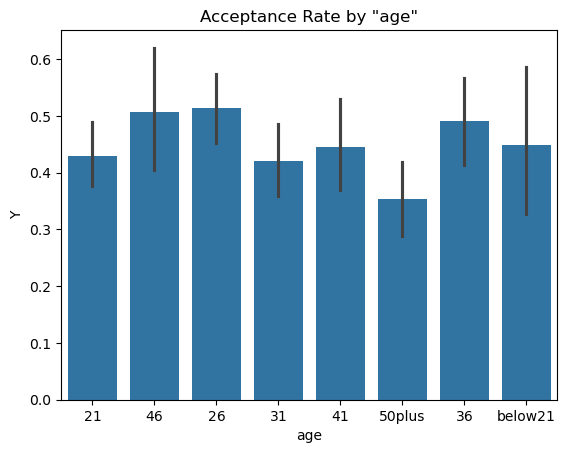

In [221]:
sns.barplot(x = more_exp_restr_data['age'], y = more_exp_restr_data['Y'])
plt.title('Acceptance Rate by "age"')
plt.savefig('rate_by_age.png')

There doesn't really seem to be an overall pattern in regards to age. The three highest acceptance rate age groups were 46, 26, and 36. While the lowest were 50plus, 31, and 21. I would say that if this data was filtered, there could potential be a more strark difference in the age groups, but for now there is no obvious pattern.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Single'),
  Text(1, 0, 'Married partner'),
  Text(2, 0, 'Unmarried partner'),
  Text(3, 0, 'Divorced'),
  Text(4, 0, 'Widowed')])

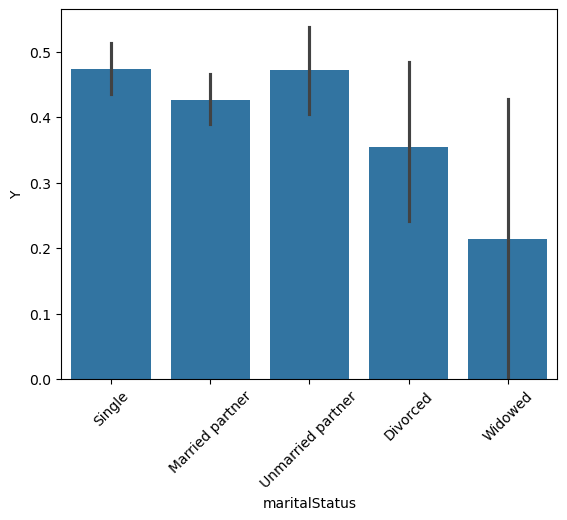

In [118]:
sns.barplot(x = more_exp_restr_data['maritalStatus'], y = more_exp_restr_data['Y'])
plt.xticks(rotation=45) 

<Axes: xlabel='has_children', ylabel='Y'>

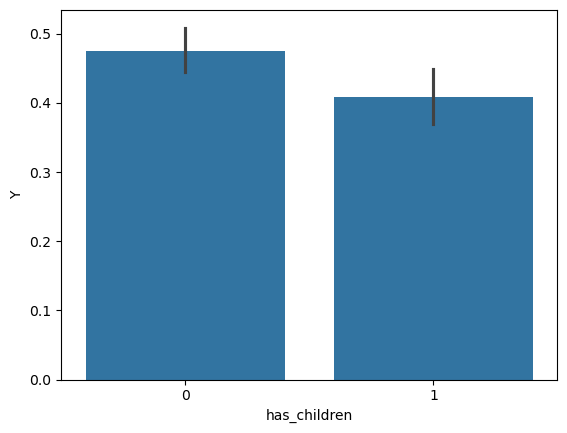

In [120]:
sns.barplot(x = more_exp_restr_data['has_children'], y = more_exp_restr_data['Y'])

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Bachelors degree'),
  Text(1, 0, 'Some college - no degree'),
  Text(2, 0, 'Associates degree'),
  Text(3, 0, 'High School Graduate'),
  Text(4, 0, 'Graduate degree (Masters or Doctorate)'),
  Text(5, 0, 'Some High School')])

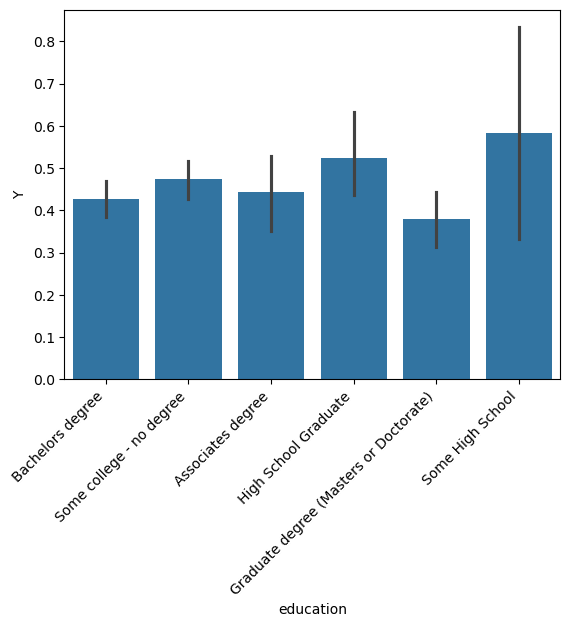

In [126]:
sns.barplot(x = more_exp_restr_data['education'], y = more_exp_restr_data['Y'])
plt.xticks(rotation=45, ha='right') 

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, 'Architecture & Engineering'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Education&Training&Library'),
  Text(3, 0, 'Unemployed'),
  Text(4, 0, 'Healthcare Support'),
  Text(5, 0, 'Healthcare Practitioners & Technical'),
  Text(6, 0, 'Sales & Related'),
  Text(7, 0, 'Management'),
  Text(8, 0, 'Arts Design Entertainment Sports & Media'),
  Text(9, 0, 'Computer & Mathematical'),
  Text(10, 0, 'Life Physical Social Science'),
  Text(11, 0, 'Personal Care & Service'),
  Text(12, 0, 'Office & Administrative Support'),
  Text(13, 0, 'Construction & Extraction'),
  Text(14, 0, 'Legal'),
  Text(15, 0, 'Retired'),
  Text(16, 0, 'Community & Social Services'),
  Text(17, 0, 'Installation Maintenance & Repair'),
  Text(18, 0, 'Transportation & Material Moving'),
  Text(19, 0, 'Business & Financial'),
  Text(20, 0, 'Protective Service'),
  Text(21,

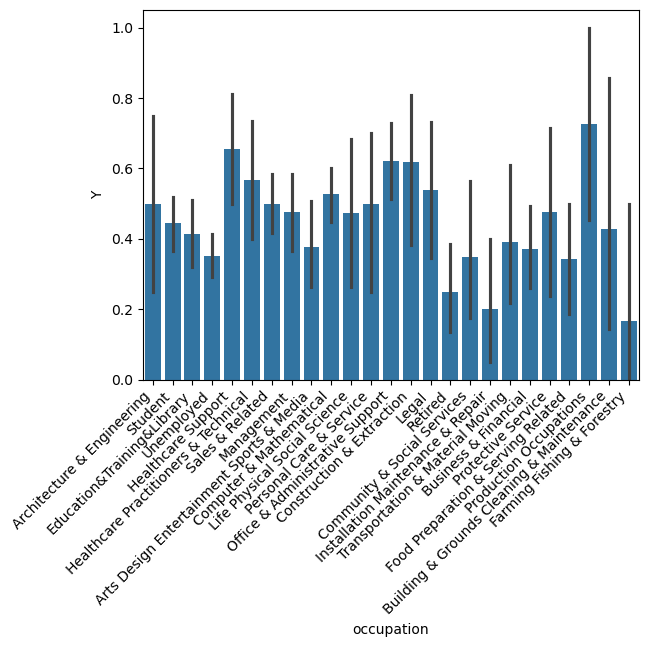

In [130]:
sns.barplot(x = more_exp_restr_data['occupation'], y = more_exp_restr_data['Y'])
plt.xticks(rotation=45, ha='right') 

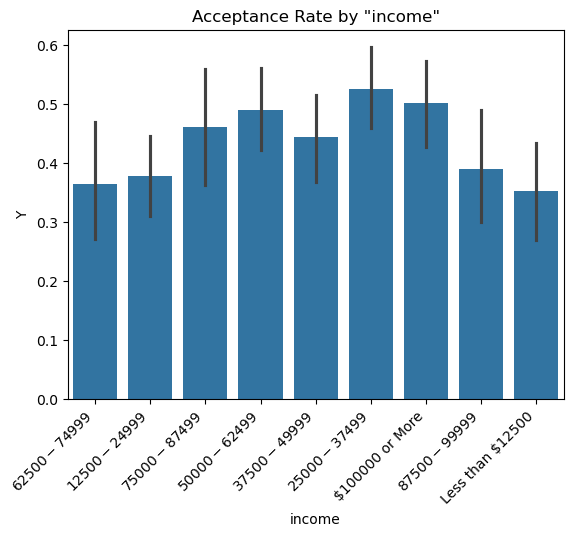

In [219]:
sns.barplot(x = more_exp_restr_data['income'], y = more_exp_restr_data['Y'])
plt.xticks(rotation=45, ha='right')
plt.title('Acceptance Rate by "income"')
plt.savefig('rate_by_income.png')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'never'),
  Text(1, 0, 'less1'),
  Text(2, 0, '1~3'),
  Text(3, 0, 'gt8'),
  Text(4, 0, '4~8')])

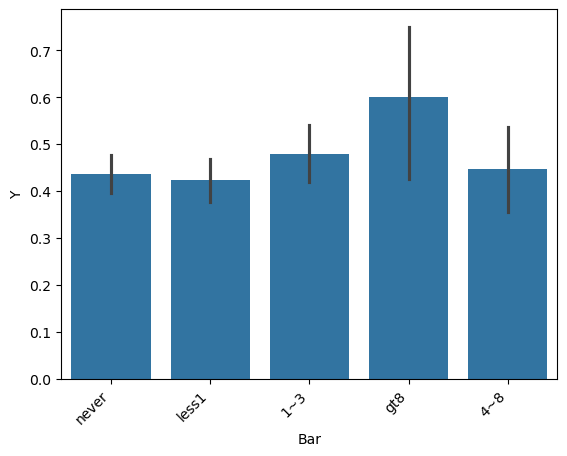

In [136]:
sns.barplot(x = more_exp_restr_data['Bar'], y = more_exp_restr_data['Y'])
plt.xticks(rotation=45, ha='right') 

([0, 1, 2, 3, 4],
 [Text(0, 0, 'less1'),
  Text(1, 0, '4~8'),
  Text(2, 0, '1~3'),
  Text(3, 0, 'gt8'),
  Text(4, 0, 'never')])

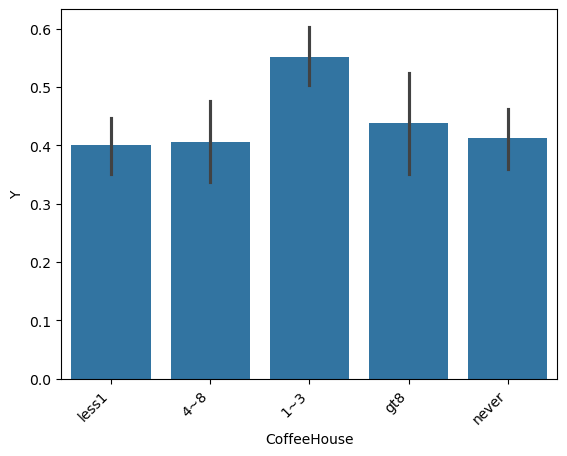

In [138]:
sns.barplot(x = more_exp_restr_data['CoffeeHouse'], y = more_exp_restr_data['Y'])
plt.xticks(rotation=45, ha='right') 

([0, 1, 2, 3, 4],
 [Text(0, 0, '4~8'),
  Text(1, 0, '1~3'),
  Text(2, 0, 'gt8'),
  Text(3, 0, 'less1'),
  Text(4, 0, 'never')])

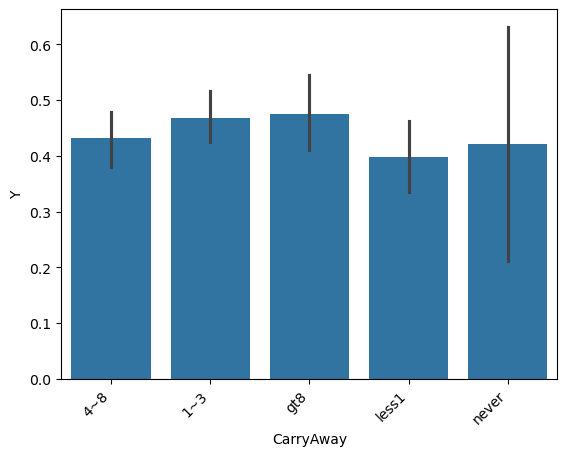

In [140]:
sns.barplot(x = more_exp_restr_data['CarryAway'], y = more_exp_restr_data['Y'])
plt.xticks(rotation=45, ha='right')

([0, 1, 2, 3, 4],
 [Text(0, 0, '4~8'),
  Text(1, 0, '1~3'),
  Text(2, 0, 'less1'),
  Text(3, 0, 'gt8'),
  Text(4, 0, 'never')])

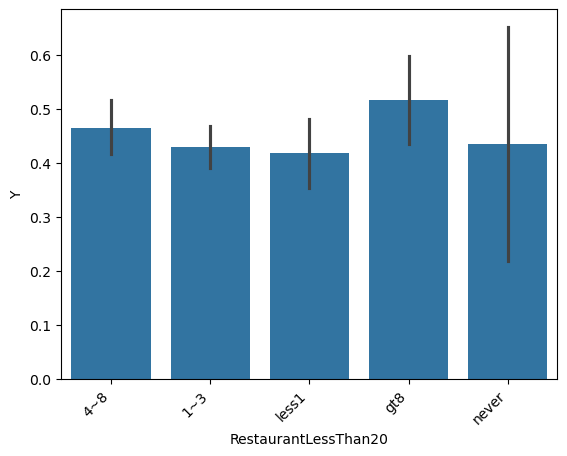

In [142]:
sns.barplot(x = more_exp_restr_data['RestaurantLessThan20'], y = more_exp_restr_data['Y'])
plt.xticks(rotation=45, ha='right')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'less1'),
  Text(1, 0, 'never'),
  Text(2, 0, '1~3'),
  Text(3, 0, 'gt8'),
  Text(4, 0, '4~8')])

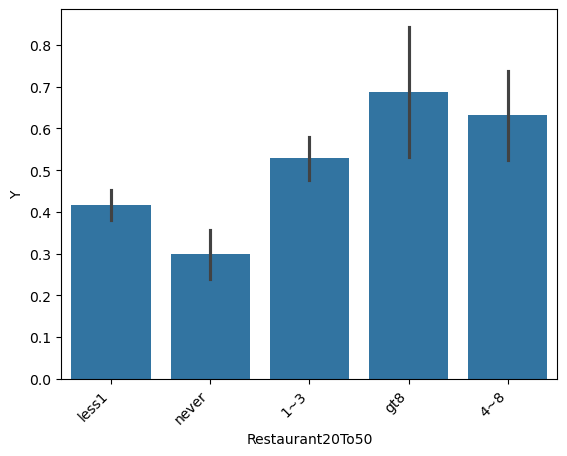

In [144]:
sns.barplot(x = more_exp_restr_data['Restaurant20To50'], y = more_exp_restr_data['Y'])
plt.xticks(rotation=45, ha='right')

<Axes: xlabel='direction_same', ylabel='Y'>

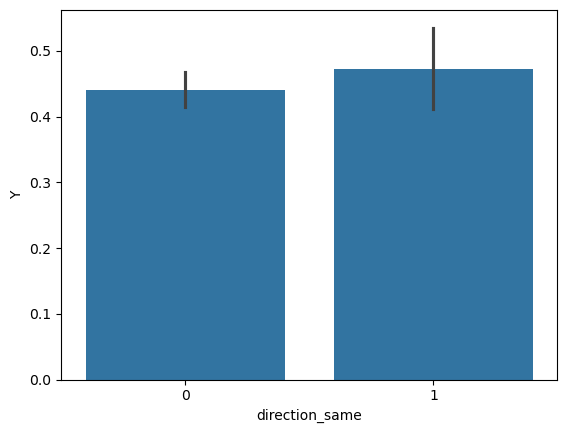

In [150]:
sns.barplot(x = more_exp_restr_data['direction_same'], y = more_exp_restr_data['Y'])

<Axes: xlabel='direction_opp', ylabel='Y'>

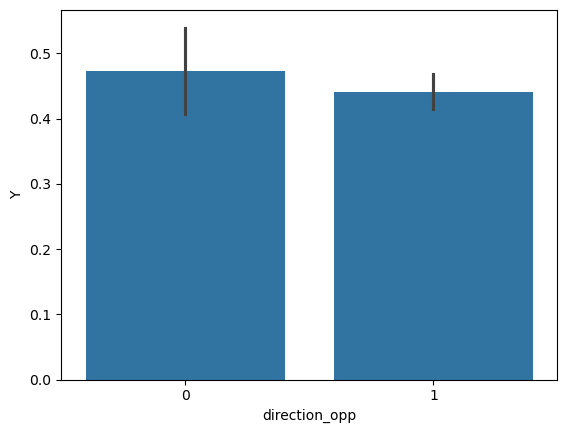

In [152]:
sns.barplot(x = more_exp_restr_data['direction_opp'], y = more_exp_restr_data['Y'])

In [182]:
# Group 1 to explore, younger 
# Query to show high acceptance levels with categorical age values
group1_total = more_exp_restr_data.query(
    '(Bar == "gt8" or Bar == "4~8") & has_children == 0 & occupation not in ["Farming Fishing & Forestry"]'
).shape[0]

group1_yes = more_exp_restr_data.query(
    '(Bar == "gt8" or Bar == "4~8") & has_children == 0 & occupation not in ["Farming Fishing & Forestry"] & (Y == 1)'
).shape[0]


# Query to show low acceptance levels with categorical age values
group2_total = more_exp_restr_data.query(
    '(destination == "Work" | passanger == "Alone" | has_children == 1)'
).shape[0]

# Query to show low acceptance levels with categorical age values
group2_yes = more_exp_restr_data.query(
    '(destination == "Work" | passanger == "Alone" | has_children == 1) & Y == 1'
).shape[0]

group1_acceptance_rate = group1_yes/group1_total
group2_acceptance_rate = group2_yes/group2_total

print(group1_acceptance_rate, group2_acceptance_rate)

0.48091603053435117 0.4269005847953216


In [196]:
# Group 3
group3_total = more_exp_restr_data.query('(CoffeeHouse == "1~3") & has_children == 0').shape[0]

group3_yes = more_exp_restr_data.query('(CoffeeHouse == "1~3") & has_children == 0 & Y == 1').shape[0]

group3_acceptance_rate = group3_yes/group3_total

# Group 4
group4_total = more_exp_restr_data.query(
    '((Bar == "gt8" or Bar == "4~8") or (CoffeeHouse == "1~3")) & has_children == 0'
).shape[0]
group4_yes = more_exp_restr_data.query(
    '((Bar == "gt8" or Bar == "4~8") or (CoffeeHouse == "1~3")) & has_children == 0 & Y == 1'
).shape[0]

group4_acceptance_rate = group4_yes/group4_total

# Group 5
group5_total = more_exp_restr_data.query('(expiration == "1d") & has_children == 0').shape[0]
group5_yes = more_exp_restr_data.query('(expiration == "1d") & has_children == 0 & Y == 1').shape[0]

group5_acceptance_rate = group5_yes/group5_total

print('Group 1: ', group1_acceptance_rate, ' Group 2: ', group2_acceptance_rate, ' Group 3: '
, group3_acceptance_rate, ' Group 4: ', group4_acceptance_rate, ' Group 5: ', group5_acceptance_rate)

Group 1:  0.48091603053435117  Group 2:  0.4269005847953216  Group 3:  0.56  Group 4:  0.5333333333333333  Group 5:  0.5547024952015355


In conclusion, it appears that those who are not in a rush, frequent coffee shops and bars, and do not have children have the highest rate of acceptance of the coupons. Some external factors also appear to be signficant differentiators for accepting or not accepting a coupon. If its warm, sunny, and later afternoon or late morning, this coupons seem to have higher acceptance rates than when it is cold and precipitation. It does not appear that age and gender have a siginficant impact on the acceptance rate of coupons.